In [75]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing 

In [76]:
data = pd.read_excel(r"S:\Nitish\marketing\CLUSTERING.xlsx")

In [77]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [78]:
data

,U_USER_ID,RECENCY,FREQUENCY,MONETARY,AVG_MONETARY
0,1919662.0,683.0,1.0,15799.012500,15799.012500
1,2202435.0,613.0,1.0,3929.475221,3929.475221
2,1227547.0,709.0,1.0,15000.000000,15000.000000
3,1074467.0,809.0,1.0,5467.136950,5467.136950
4,7826102.0,106.0,1.0,16800.003000,16800.003000
5,6653385.0,148.0,1.0,2231.000000,2231.000000
6,1599926.0,550.0,1.0,8000.000000,8000.000000
7,2574637.0,556.0,1.0,0.000000,0.000000
8,1042121.0,340.0,1.0,4200.000000,4200.000000
9,856792.0,855.0,1.0,1518.552900,1518.552900


In [79]:
y = data.iloc[:,[1,2,3]]

In [80]:
X = data[['RECENCY' , 'FREQUENCY','MONETARY']].iloc[: , :].values

In [81]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

In [82]:
X = min_max_scaler.fit_transform(X) 

In [83]:
X

array([[0.12397894, 0.        , 0.05290404],
       [0.11127246, 0.        , 0.01315811],
       [0.12869849, 0.        , 0.05022849],
       ...,
       [0.11163551, 0.        , 0.02250236],
       [0.0283173 , 0.        , 0.01203522],
       [0.11381376, 0.        , 0.00388297]])

In [84]:
Standardisation = preprocessing.StandardScaler() 
X_train = Standardisation.fit_transform(X) 

In [85]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(y[['RECENCY','FREQUENCY','MONETARY']])
    sse.append(km.inertia_)

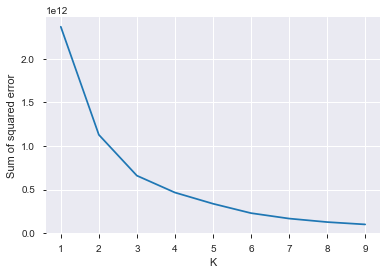

In [86]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [87]:
km = KMeans(n_clusters=3)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [88]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['RECENCY','FREQUENCY','MONETARY']])
y_predicted

array([2, 0, 2, ..., 0, 0, 0])

In [89]:
y_predicted

array([2, 0, 2, ..., 0, 0, 0])

In [91]:
data['cluster']=y_predicted
data

,U_USER_ID,RECENCY,FREQUENCY,MONETARY,AVG_MONETARY,cluster
0,1919662.0,683.0,1.0,15799.012500,15799.012500,2
1,2202435.0,613.0,1.0,3929.475221,3929.475221,0
2,1227547.0,709.0,1.0,15000.000000,15000.000000,2
3,1074467.0,809.0,1.0,5467.136950,5467.136950,0
4,7826102.0,106.0,1.0,16800.003000,16800.003000,2
5,6653385.0,148.0,1.0,2231.000000,2231.000000,0
6,1599926.0,550.0,1.0,8000.000000,8000.000000,2
7,2574637.0,556.0,1.0,0.000000,0.000000,0
8,1042121.0,340.0,1.0,4200.000000,4200.000000,0
9,856792.0,855.0,1.0,1518.552900,1518.552900,0


In [96]:
km.cluster_centers_

array([[3.98973642e+02, 1.01632682e+00, 3.02831735e+03],
       [4.04688966e+02, 1.28931364e+00, 3.52931576e+04],
       [4.16414516e+02, 1.07907671e+00, 1.16132230e+04]])

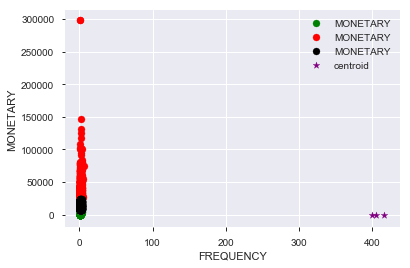

In [98]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.FREQUENCY,df1['MONETARY'],color='green')
plt.scatter(df2.FREQUENCY,df2['MONETARY'],color='red')
plt.scatter(df3.FREQUENCY,df3['MONETARY'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('FREQUENCY')
plt.ylabel('MONETARY')
plt.legend()

In [ ]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.FREQUENCY,df1['MONETARY'],color='green')
plt.scatter(df2.FREQUENCY,df2['MONETARY'],color='red')
plt.scatter(df3.FREQUENCY,df3['MONETARY'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('FREQUENCY')
plt.ylabel('MONETARY')
plt.legend()

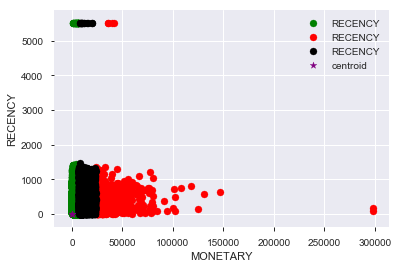

In [100]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.MONETARY,df1['RECENCY'],color='green')
plt.scatter(df2.MONETARY,df2['RECENCY'],color='red')
plt.scatter(df3.MONETARY,df3['RECENCY'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('MONETARY')
plt.ylabel('RECENCY')
plt.legend()